In [1]:
!pip install -U --upgrade tensorflow

In [2]:
# from tensorflow_docs.vis import embed
from tensorflow import keras
#from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

In [3]:
TRAIN_SAMPLE_FOLDER = r"C:\Users\101ri\OneDrive\Desktop\New DeepFake\train_sample_videos"
TEST_FOLDER = r"C:\Users\101ri\OneDrive\Desktop\New DeepFake\test_videos"
DATA_FOLDER = r"C:\Users\101ri\OneDrive\Desktop\New DeepFake\Video Folder"
# Print the number of files in each folder
train_samples = len(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))
test_samples = len(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")

Train samples: 401
Test samples: 400


In [4]:
train_videos = os.listdir(TRAIN_SAMPLE_FOLDER)
print("Train videos:")
for video in train_videos:
    print(video)

# List all video files in the test folder
test_videos = os.listdir(TEST_FOLDER)
print("\nTest videos:")
for video in test_videos:
    print(video)

# Print the number of files in each folder
print(f"\nTotal Train samples: {len(train_videos)}")
print(f"Total Test samples: {len(test_videos)}")

Train videos:
aagfhgtpmv.mp4
aapnvogymq.mp4
abarnvbtwb.mp4
abofeumbvv.mp4
abqwwspghj.mp4
acifjvzvpm.mp4
acqfdwsrhi.mp4
acxnxvbsxk.mp4
acxwigylke.mp4
aczrgyricp.mp4
adhsbajydo.mp4
adohikbdaz.mp4
adylbeequz.mp4
aelfnikyqj.mp4
aelzhcnwgf.mp4
aettqgevhz.mp4
aevrfsexku.mp4
afoovlsmtx.mp4
agdkmztvby.mp4
agqphdxmwt.mp4
agrmhtjdlk.mp4
ahbweevwpv.mp4
ahdbuwqxit.mp4
ahfazfbntc.mp4
ahqqqilsxt.mp4
aipfdnwpoo.mp4
ajqslcypsw.mp4
ajwpjhrbcv.mp4
aklqzsddfl.mp4
aknbdpmgua.mp4
aknmpoonls.mp4
akvmwkdyuv.mp4
akxoopqjqz.mp4
akzbnazxtz.mp4
aladcziidp.mp4
alaijyygdv.mp4
alninxcyhg.mp4
altziddtxi.mp4
alvgwypubw.mp4
amaivqofda.mp4
amowujxmzc.mp4
andaxzscny.mp4
aneclqfpbt.mp4
anpuvshzoo.mp4
aorjvbyxhw.mp4
apatcsqejh.mp4
apgjqzkoma.mp4
apogckdfrz.mp4
aqpnvjhuzw.mp4
arkroixhey.mp4
arlmiizoob.mp4
arrhsnjqku.mp4
asaxgevnnp.mp4
asdpeebotb.mp4
aslsvlvpth.mp4
asmpfjfzif.mp4
asvcrfdpnq.mp4
atkdltyyen.mp4
atvmxvwyns.mp4
atxvxouljq.mp4
atyntldecu.mp4
atzdznmder.mp4
aufmsmnoye.mp4
augtsuxpzc.mp4
avfitoutyn.mp4
avgiuextiz.

In [5]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
import sys
%matplotlib inline
import pickle
import shutil
import time
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Input
from keras.preprocessing import image as im
from keras.applications.inception_v3 import preprocess_input,decode_predictions
from keras.models import load_model

In [6]:
import keras
print('Keras version:', keras.__version__)
print('OpenCV version:', cv2.__version__)

Keras version: 3.5.0
OpenCV version: 4.10.0


In [7]:
train_sample_metadata=pd.read_csv("metadata.csv")

In [8]:
train_sample_metadata.head()

,videoname,original_width,original_height,label,original
0,aznyksihgl.mp4,129,129,FAKE,xnojggkrxt.mp4
1,gkwmalrvcj.mp4,129,129,FAKE,hqqmtxvbjj.mp4
2,lxnqzocgaq.mp4,223,217,FAKE,xjzkfqddyk.mp4
3,itsbtrrelv.mp4,186,186,FAKE,kqvepwqxfe.mp4
4,ddvgrczjno.mp4,155,155,FAKE,pluadmqqta.mp4


In [9]:
train_sample_metadata.shape

(95634, 5)

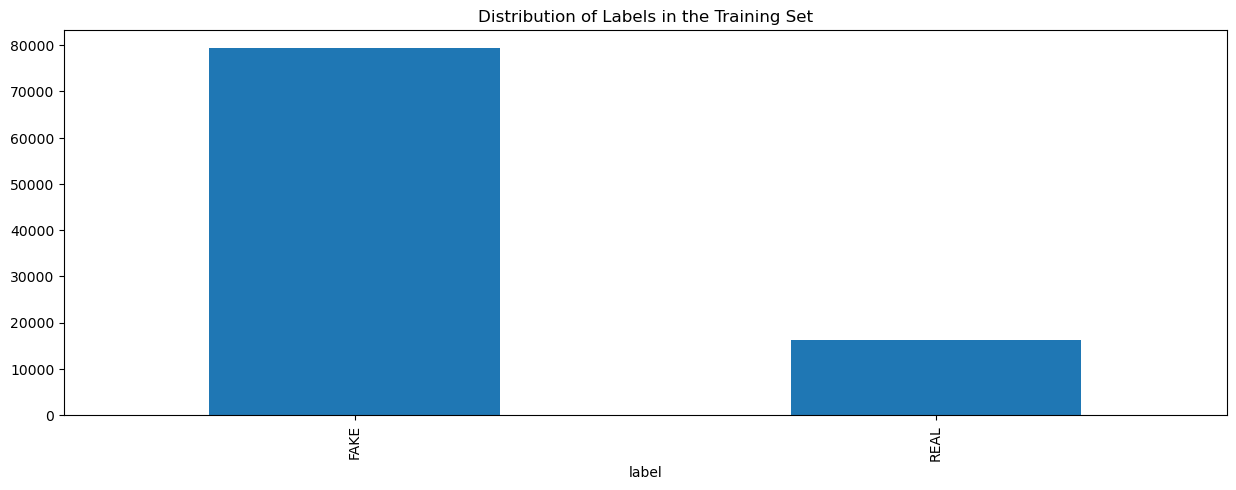

In [10]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

fake

In [11]:
fake_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='FAKE'].sample(3).index)
fake_train_sample_video

[24956, 5933, 48355]

In [12]:
def display_image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv2.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(frame)

In [13]:
fake_train_sample_video = [train_videos[i] for i in fake_train_sample_video if isinstance(i, int) and i < len(train_videos)]

# Now loop over the video file names
for video_file in fake_train_sample_video:
    video_path = os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file)
    display_image_from_video(video_path)

In [14]:
fake_train_sample_video

[]

In [15]:
for video_file in fake_train_sample_video:
    display_image_from_video(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file))

for real video

In [16]:
real_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='REAL'].sample(3).index)
real_train_sample_video

[74335, 53911, 38121]

In [17]:
# Assume all video file names are in train_videos (list of video file names)
real_train_sample_video = [train_videos[i] for i in real_train_sample_video if isinstance(i, int) and i < len(train_videos)]

# Now loop over the video file names
for video_file in real_train_sample_video:
    video_path = os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file)
    display_image_from_video(video_path)


In [18]:
real_train_sample_video

[]

video with same origin

In [19]:
train_sample_metadata['original'].value_counts()[0:5]

original
xosbvurwon.mp4    36
gggxkzqtvh.mp4    35
ypgayhhaxx.mp4    35
hkjnztvsmk.mp4    34
objgwnmscm.mp4    34
Name: count, dtype: int64

In [20]:
def display_image_from_video_list(video_path_list, video_folder=TRAIN_SAMPLE_FOLDER):
    '''
    input: video_path_list - path for video
    process:
    0. for each video in the video path list
        1. perform a video capture from the video
        2. read the image
        3. display the image
    '''
    plt.figure()
    fig, ax = plt.subplots(2,3,figsize=(16,8))
    # we only show images extracted from the first 6 videos
    for i, video_file in enumerate(video_path_list[0:6]):
        video_path = os.path.join(DATA_FOLDER, video_folder,video_file)
        capture_image = cv2.VideoCapture(video_path) 
        ret, frame = capture_image.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        ax[i//3, i%3].imshow(frame)
        ax[i//3, i%3].set_title(f"Video: {video_file}")
        ax[i//3, i%3].axis('on')

<Figure size 640x480 with 0 Axes>

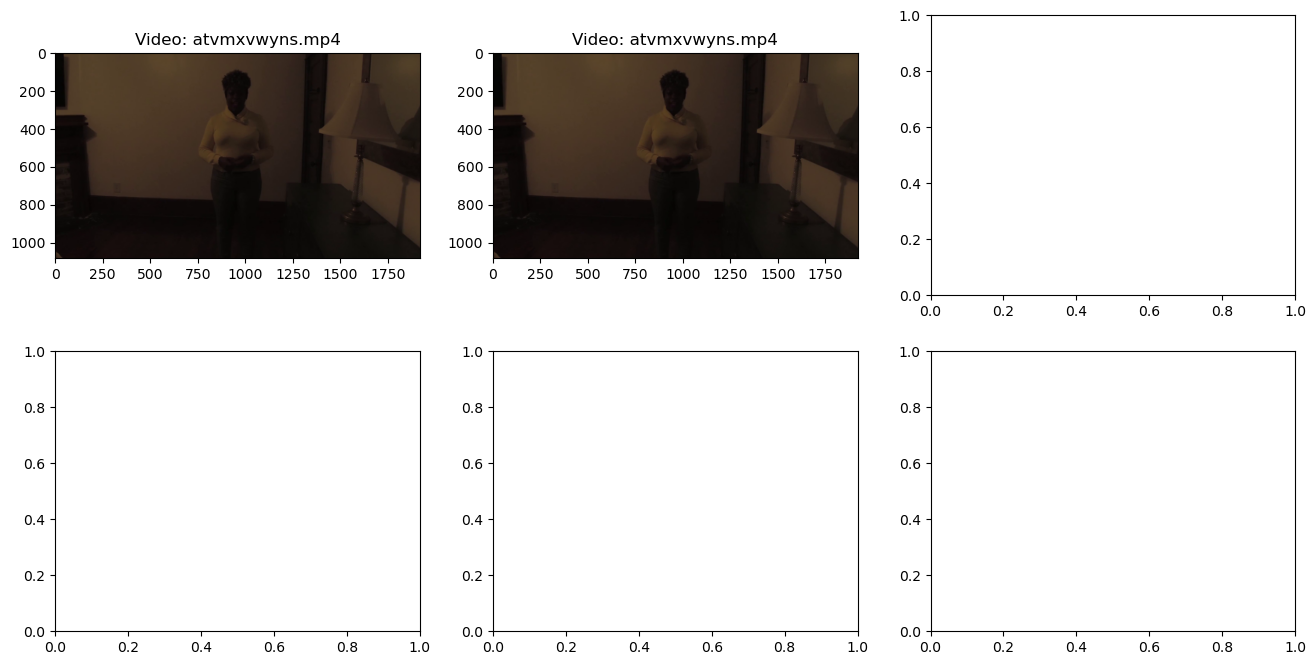

In [21]:
same_original_fake_train_sample_video = train_sample_metadata.loc[train_sample_metadata.original == 'atvmxvwyns.mp4'].index.tolist()

# Convert indices to actual file names
same_original_fake_train_sample_video = [train_sample_metadata.loc[idx, 'original'] for idx in same_original_fake_train_sample_video]

# Pass the list of file names to display_image_from_video_list
display_image_from_video_list(same_original_fake_train_sample_video)

In [22]:
## testing video files

In [23]:
test_videos = pd.DataFrame(list(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER))), columns=['video'])

In [24]:
test_videos.head()

,video
0,aassnaulhq.mp4
1,aayfryxljh.mp4
2,acazlolrpz.mp4
3,adohdulfwb.mp4
4,ahjnxtiamx.mp4


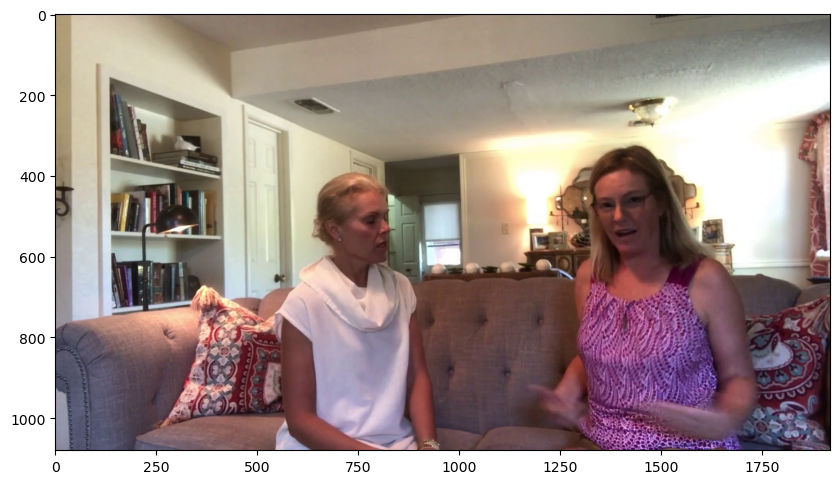

In [25]:
display_image_from_video(os.path.join(DATA_FOLDER, TEST_FOLDER, test_videos.iloc[2].video))

In [26]:
### Play video file

In [27]:
fake_videos = list(train_sample_metadata.loc[train_sample_metadata.label=='FAKE'].index)

In [28]:
fake_videos

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 86,
 87,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 108,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 124,
 126,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 146,
 148,
 149,
 150,
 151,
 152,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 186,
 189,
 190,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 

In [29]:
from IPython.display import HTML
from base64 import b64encode
import os

def play_video(video_file, subset=TRAIN_SAMPLE_FOLDER):
    '''
    Display video
    param: video_file - the name of the video file to display
    param: subset - the folder where the video file is located (can be TRAIN_SAMPLE_FOLDER or TEST_Folder)
    '''
    video_url = open(os.path.join(DATA_FOLDER, subset, video_file), 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(video_url).decode()
    return HTML(f"""<video width=500 controls><source src="{data_url}" type="video/mp4"></video>""")

# Ensure fake_videos contains valid filenames
print(fake_videos)

# Call the function with the correct video file name
if isinstance(fake_videos[10], str):
    play_video(fake_videos[10])
else:
    print(f"Invalid entry: {fake_videos[10]} (type: {type(fake_videos[10])})")


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 146, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 186, 189, 190, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 251

CNN_RNN

In [30]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 10

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [31]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)


            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)
            


In [32]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

In [33]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = list(df.index)
    labels = df["label"].values
    labels = np.array(labels=='FAKE').astype(int)

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]



        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels

In [34]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(train_sample_metadata,test_size=0.1,random_state=42,stratify=train_sample_metadata['label'])

print(Train_set.shape, Test_set.shape )

(86070, 5) (9564, 5)


In [35]:
Train_set

,videoname,original_width,original_height,label,original
12328,avjoadrpkd.mp4,223,223,FAKE,brfjxrbezo.mp4
72853,sgclhrswid.mp4,129,129,FAKE,egoxlpllxp.mp4
56274,bydbcnqmyu.mp4,222,223,FAKE,mrhacvsbkp.mp4
14806,ajiyjjalau.mp4,267,268,FAKE,syzrwrglkl.mp4
55875,jloctarpah.mp4,223,223,REAL,NaN
...,...,...,...,...,...
42973,hjfbpeglsg.mp4,129,129,FAKE,ohzpttgymc.mp4
35031,blswnkmgtn.mp4,75,75,FAKE,terivbcgpp.mp4
91239,qxthkomtmn.mp4,268,268,FAKE,ipewbhfpen.mp4
44490,bdypohxfxs.mp4,223,223,FAKE,vlzkhrxcdb.mp4


In [36]:
Test_set

,videoname,original_width,original_height,label,original
23550,kcuuowwupx.mp4,155,155,FAKE,mgbreujfhd.mp4
38718,ofcaweirnf.mp4,129,129,FAKE,vvyuathbkl.mp4
7532,ztkncwntmq.mp4,268,268,FAKE,iqrixqebob.mp4
11356,tdwsygpssz.mp4,186,185,FAKE,wekvtahsgt.mp4
35092,akpbyalynb.mp4,155,155,FAKE,imnhgitwer.mp4
...,...,...,...,...,...
1845,osmkcnlhnx.mp4,129,129,FAKE,dwuyuvtbcs.mp4
91781,qgqkgcaddb.mp4,108,107,REAL,NaN
92498,yeouperxzc.mp4,186,186,FAKE,vmxfwxgdei.mp4
26475,xnvvoscjjc.mp4,107,107,REAL,NaN


In [37]:
import numpy as np
import os

def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    # Convert index to string if it's not already
    video_paths = [str(path) for path in df.index]
    labels = df["label"].values
    labels = np.array(labels == 'FAKE').astype(int)  # Use `int`

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Debug: Check type of path
        print(f"Type of path: {type(path)}, Value: {path}")

        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx, :] = temp_frame_features.squeeze()
        frame_masks[idx, :] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


In [38]:
stop

NameError: name 'stop' is not defined

In [ ]:
train_data, train_labels = prepare_all_videos(Train_set, "train")
test_data, test_labels = prepare_all_videos(Test_set, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

Type of path: <class 'str'>, Value: 12328
Type of path: <class 'str'>, Value: 72853
Type of path: <class 'str'>, Value: 56274
Type of path: <class 'str'>, Value: 14806
Type of path: <class 'str'>, Value: 55875
Type of path: <class 'str'>, Value: 23427
Type of path: <class 'str'>, Value: 40661
Type of path: <class 'str'>, Value: 54830
Type of path: <class 'str'>, Value: 52849
Type of path: <class 'str'>, Value: 50797
Type of path: <class 'str'>, Value: 31090
Type of path: <class 'str'>, Value: 28167
Type of path: <class 'str'>, Value: 79610
Type of path: <class 'str'>, Value: 83779
Type of path: <class 'str'>, Value: 8563
Type of path: <class 'str'>, Value: 46591
Type of path: <class 'str'>, Value: 89763
Type of path: <class 'str'>, Value: 87585
Type of path: <class 'str'>, Value: 10742
Type of path: <class 'str'>, Value: 49288
Type of path: <class 'str'>, Value: 21137
Type of path: <class 'str'>, Value: 3222
Type of path: <class 'str'>, Value: 1519
Type of path: <class 'str'>, Value: 5

In [ ]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(train_sample_metadata,test_size=0.1,random_state=42,stratify=train_sample_metadata['label'])

print(Train_set.shape, Test_set.shape )

In [ ]:
train_data, train_labels = prepare_all_videos(Train_set, "train")
test_data, test_labels = prepare_all_videos(Test_set, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

the sequence model

In [ ]:
frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

# Refer to the following tutorial to understand the significance of using `mask`:
# https://keras.io/api/layers/recurrent_layers/gru/
x = keras.layers.GRU(16, return_sequences=True)(
    frame_features_input, mask=mask_input
)
x = keras.layers.GRU(8)(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(8, activation="relu")(x)
output = keras.layers.Dense(1, activation="sigmoid")(x)

model = keras.Model([frame_features_input, mask_input], output)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('./', save_weights_only=True, save_best_only=True)
history = model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_data=([test_data[0], test_data[1]],test_labels),
        callbacks=[checkpoint],
        epochs=EPOCHS,
        batch_size=8
    )

In [ ]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask
def sequence_prediction(path):
    frames = load_video(os.path.join(DATA_FOLDER, TEST_FOLDER,path))
    frame_features, frame_mask = prepare_single_video(frames)
    return model.predict([frame_features, frame_mask])[0]
    
# This utility is for visualization.
# Referenced from:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")


test_video = np.random.choice(test_videos["video"].values.tolist())
print(f"Test video path: {test_video}")

if(sequence_prediction(test_video)>=0.5):
    print(f'The predicted class of the video is FAKE')
else:
    print(f'The predicted class of the video is REAL')

play_video(test_video,TEST_FOLDER)